In [87]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('Diamonds Prices2022.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [65]:
#Extract relevant columns
X = df[['carat']].values  #Predictor
y = df['price'].values #Target

In [67]:
#Add a Constant to the predictor for the intercept term
X = sm.add_constant(X)

In [69]:
#Split the dataset into training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
#Fit the llinear Regression Model
ols_model = sm.OLS(y_train,X_train).fit()

In [73]:
#print the summary of ols regression
print(ols_model.summary())
#Here prob is 0 we will reject the null hypothesis

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 2.421e+05
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:04:46   Log-Likelihood:            -3.7839e+05
No. Observations:               43154   AIC:                         7.568e+05
Df Residuals:                   43152   BIC:                         7.568e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2247.4242     14.646   -153.452      0.0

In [75]:
#Make predictions on test dataset
y_pred = ols_model.predict(X_test)
y_pred

array([-386.94674021, 7132.48286332, 1628.57047311, ..., 1706.09036593,
       6124.72425666,   78.17261671])

In [77]:
#Calculate Mean Squared Error and R-squared manually for test data
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 =r2_score(y_test,y_pred)

In [79]:
mse

2315697.6330710365

In [81]:
rmse

1521.7416446529405

In [83]:
r2

0.8516827702293546

<Axes: xlabel='price', ylabel='Count'>

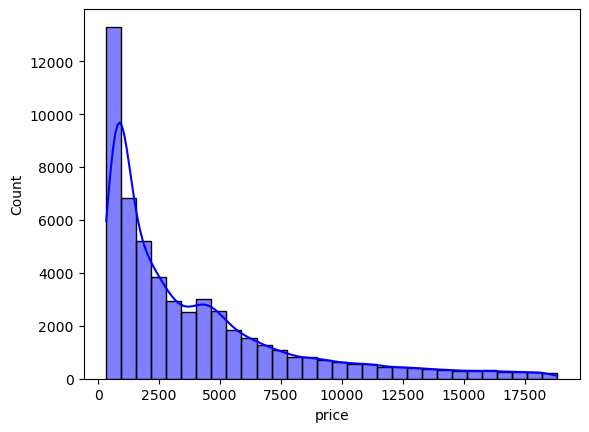

In [89]:
sns.histplot(df['price'],bins = 30,kde=True,color='blue')

<Axes: xlabel='carat', ylabel='Count'>

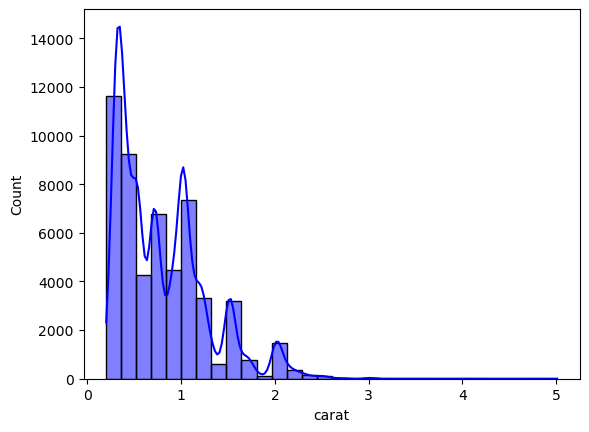

In [91]:
sns.histplot(df['carat'],bins = 30,kde=True,color='blue')